### Imports

In [1]:
#import
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,RandomOverSampler,ADASYN
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score,recall_score,f1_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
#reading csv file
credit_fraud=pd.read_csv('creditcard.csv')

In [3]:
#Copy of dataframe
credit_fraud_copy=credit_fraud

In [4]:
#checking head
credit_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#check for null values
credit_fraud.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#Checking shape
credit_fraud.shape

(284807, 31)

In [7]:
#Adding all feature column
col=credit_fraud.columns

In [8]:
#Removing target column
col=col.delete(30)

In [9]:
credit_fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Exploratory Data Analysis

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


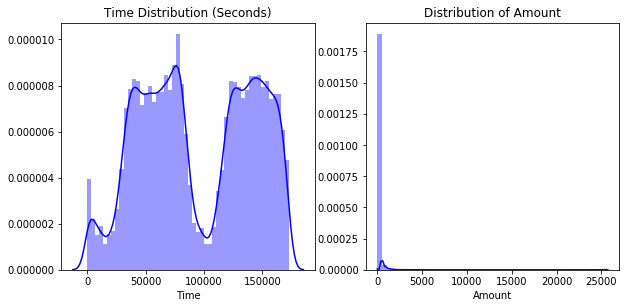

In [10]:
# plot the time feature
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')
sns.distplot(credit_fraud['Time'], color='blue')

plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(credit_fraud['Amount'],color='blue')
plt.show()

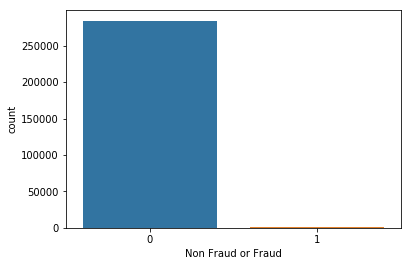

In [11]:
sns.countplot(credit_fraud['Class'])
plt.xlabel('Non Fraud or Fraud')
plt.show()

As we can see from the above result that our dataset is highly imbalanced

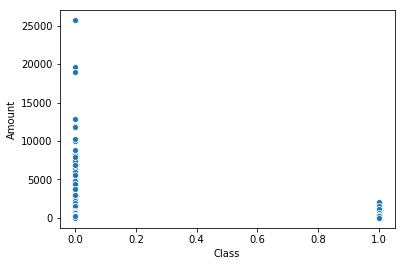

In [12]:
#Check for range of amount in which maximum fraud occured 
sns.scatterplot(credit_fraud['Class'],credit_fraud['Amount'])
plt.show()

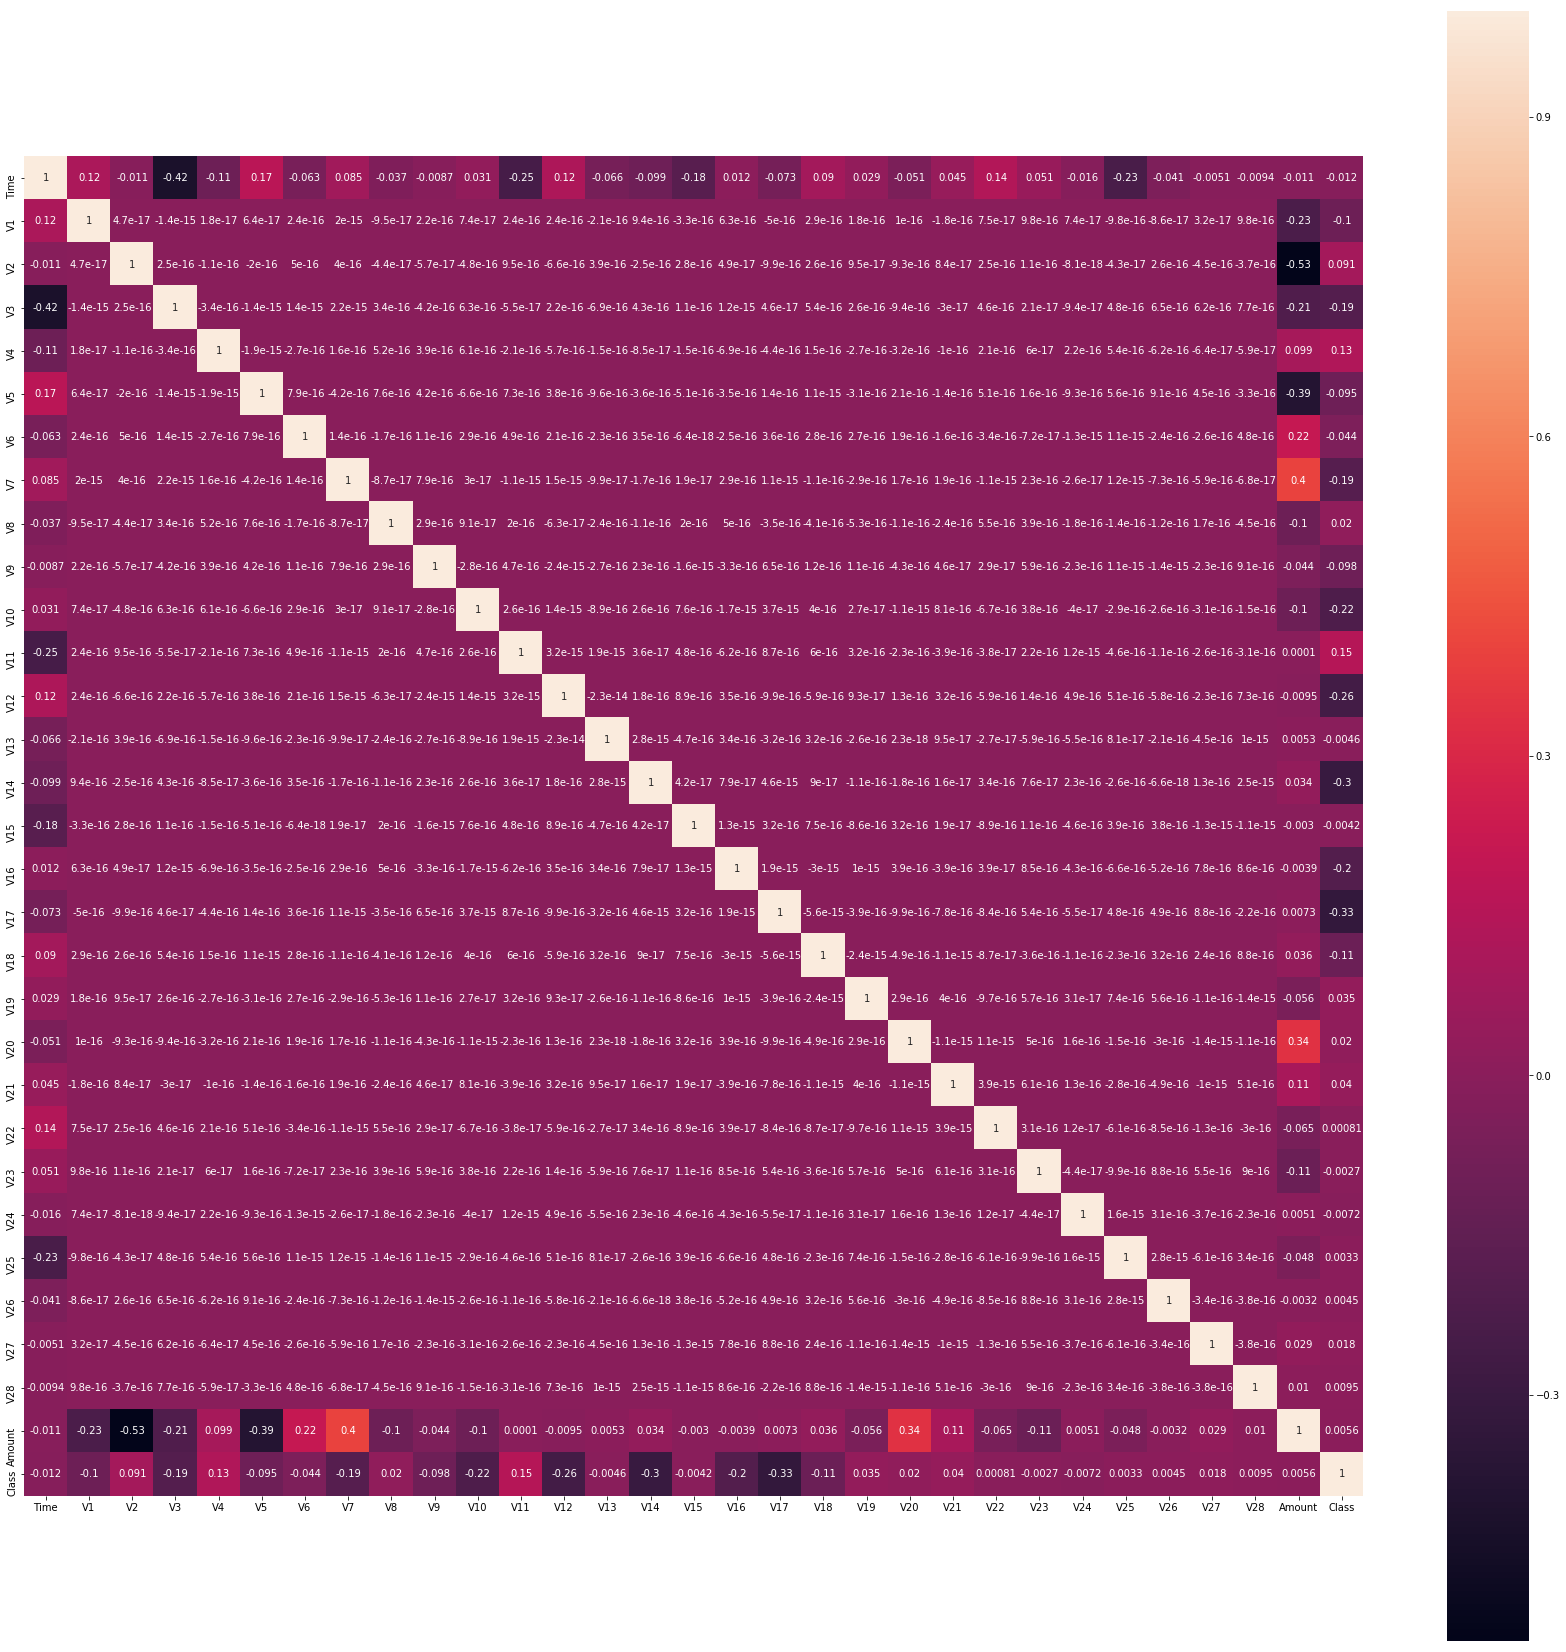

In [13]:
#Checking the correlation between the feature
plt.figure(figsize=(30,30))
sns.heatmap(credit_fraud.corr(),annot=True,square=True)
plt.show()

<li>Negative Correlations: V17, V14, V12 and V10 are negatively correlated.
<li>Positive Correlations: V2, V4, V11, and V19 are positively correlated.

<b> In depth Correlation Analysis

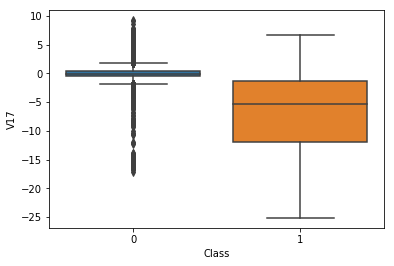

In [14]:
#Negative Correlation
sns.boxplot(x="Class", y="V17", data=credit_fraud)
plt.show()

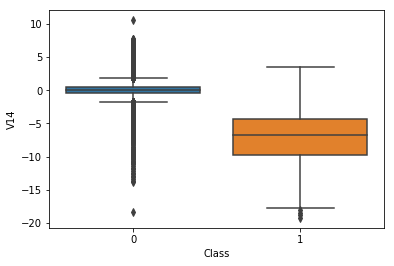

In [15]:
#Negative Correlation
sns.boxplot(x="Class", y="V14", data=credit_fraud)
plt.show()

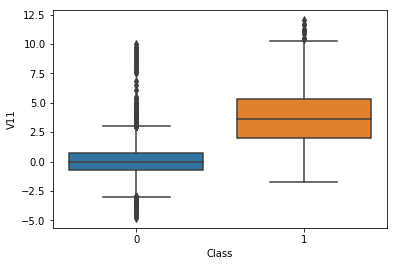

In [16]:
#Positive Correlation
sns.boxplot(x="Class", y="V11", data=credit_fraud)
plt.show()

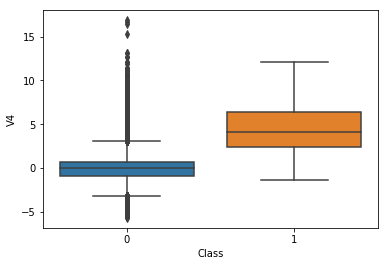

In [17]:
#Positive Correlation
sns.boxplot(x="Class", y="V4", data=credit_fraud)
plt.show()

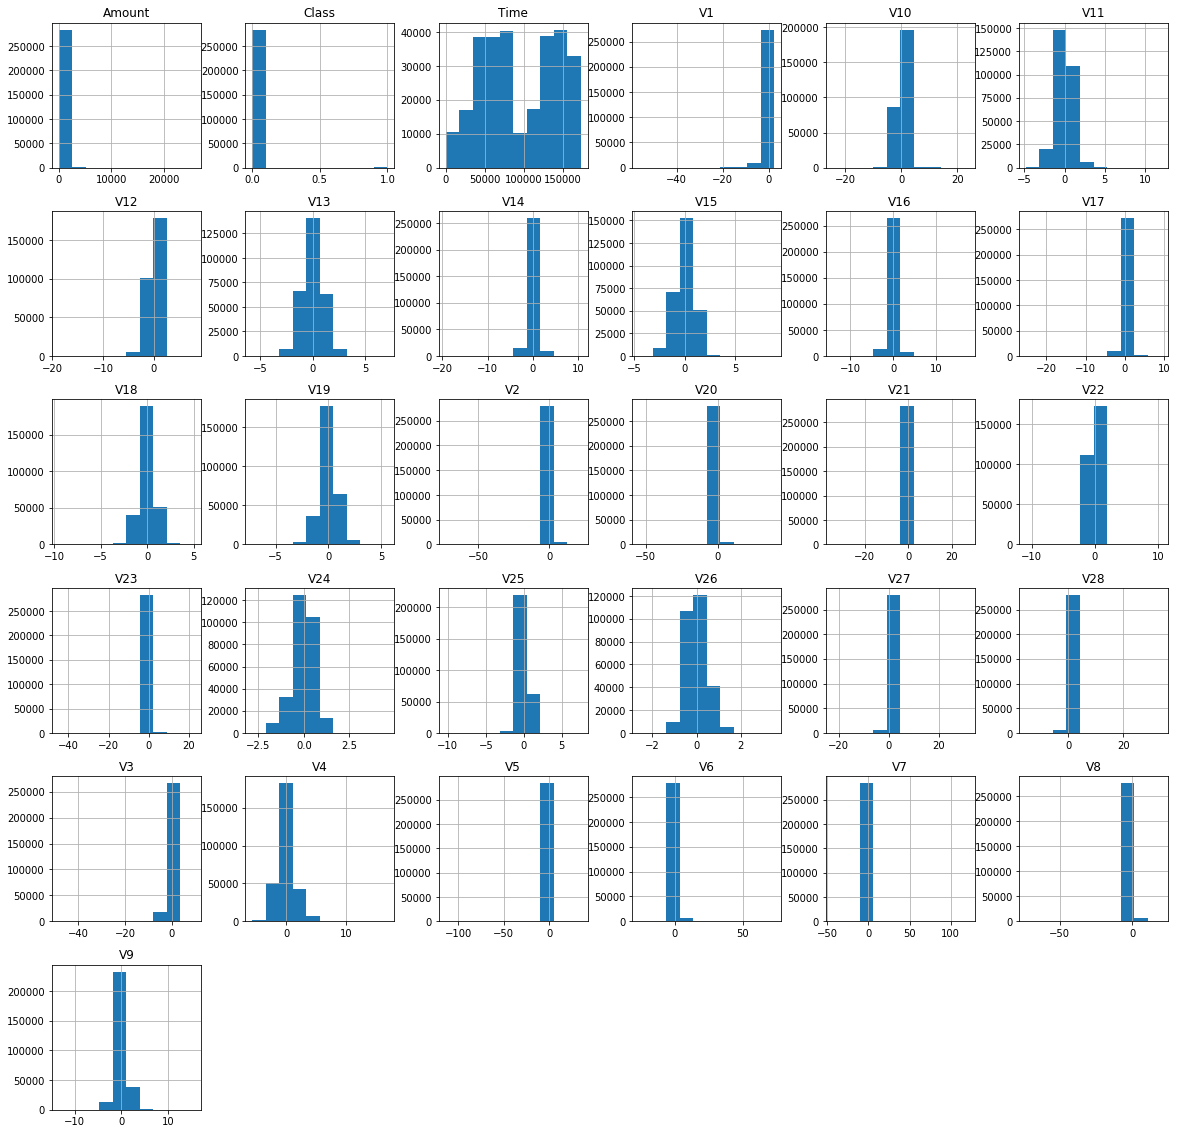

In [18]:
credit_fraud.hist(figsize=(20, 20))
plt.show()

As we can see from the above result that V1 and Amount feature does not follow Gaussian ditribution

### Scaling the dataset

In [19]:
scale_data=credit_fraud[['Time','Amount']]

In [20]:
#Scaling the Time and amount feature
scaler = StandardScaler()
scaled_df=scaler.fit_transform(scale_data)

In [21]:
scaled_df=pd.DataFrame(scaled_df)

In [22]:
credit_fraud=credit_fraud.join(scaled_df)

In [23]:
credit_fraud=credit_fraud.drop(['Time','Amount'],axis=1)
credit_fraud.rename(columns={0: "Time", 1: "Amount"},inplace=True)

In [24]:
credit_fraud

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0,-1.996541,-0.338556
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-1.996499,-0.333279
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0,-1.996436,-0.190107
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0,-1.996436,0.019392
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0,-1.996394,-0.338516


In [25]:
#Scaling on V1 and Amount dataset to perform log transformation
min_max_df=credit_fraud_copy[['V1','Amount']]

In [26]:
scaler_min_max=MinMaxScaler()
scaled_df_min_max=scaler_min_max.fit_transform(min_max_df)

### Log Transformation

Applying log transformation to make Gaussian Distribution

In [27]:
scaled_df_min_max=pd.DataFrame(scaled_df_min_max)

In [28]:
scaled_df_min_max['Amount_log']=np.log(scaled_df_min_max[1])

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [29]:
scaled_df_min_max['V1_log']=np.log(scaled_df_min_max[0])

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [30]:
scaled_df_min_max.isna().sum()

0             0
1             0
Amount_log    0
V1_log        0
dtype: int64

In [31]:
credit_fraud_copy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [32]:
#credit_fraud_copy.drop(['V1_log','Time','V1'],axis=1,inplace=True)
credit_fraud_copy.drop('V1',axis=1,inplace=True)

In [33]:
credit_fraud_copy['V1']=scaled_df_min_max[0]
credit_fraud_copy['Amount']=scaled_df_min_max[1]

In [34]:
credit_fraud_copy['Time']=credit_fraud['Time']

In [35]:
credit_fraud_copy

,Time,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,V1
0,-1.996583,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0,0.935192
1,-1.996583,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0,0.978542
2,-1.996562,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0,0.935217
3,-1.996562,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0,0.941878
4,-1.996541,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0,0.938617
5,-1.996541,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0.000143,0,0.951057
6,-1.996499,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0.000194,0,0.979184
7,-1.996436,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.001588,0,0.947348
8,-1.996436,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.003628,0,0.943101
9,-1.996394,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0.000143,0,0.952547


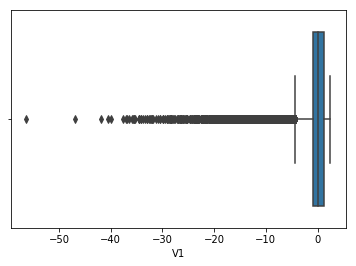

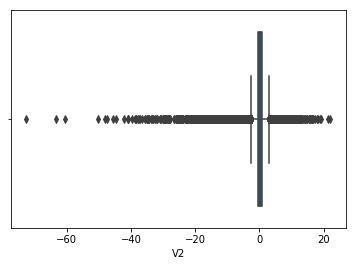

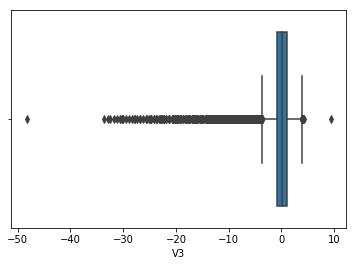

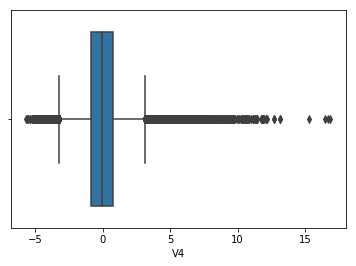

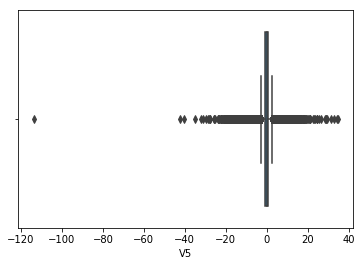

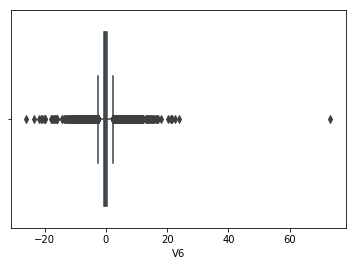

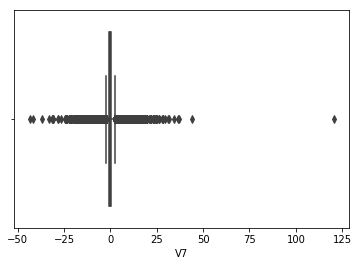

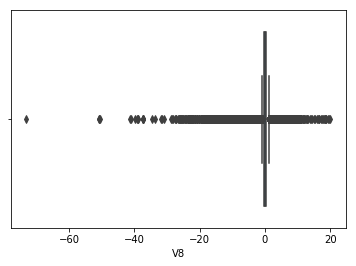

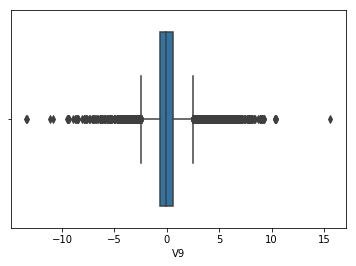

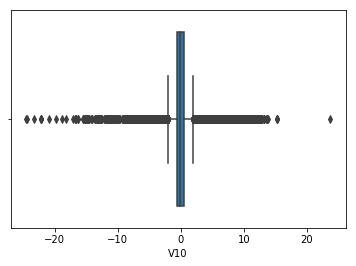

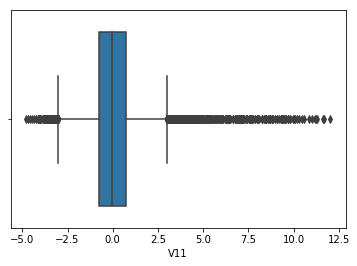

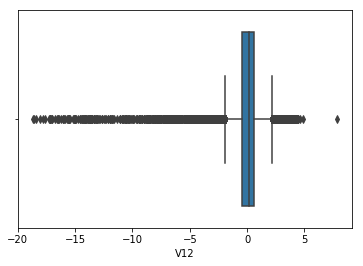

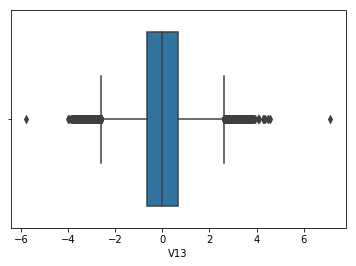

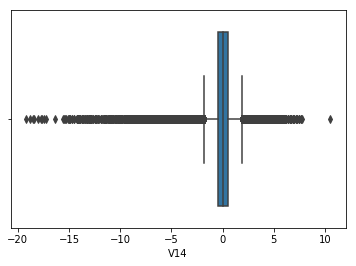

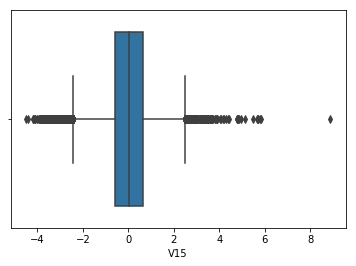

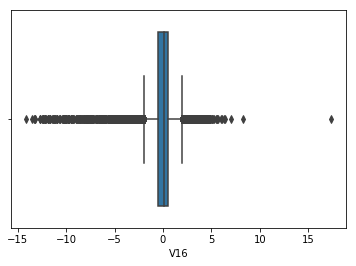

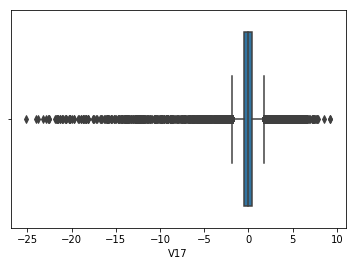

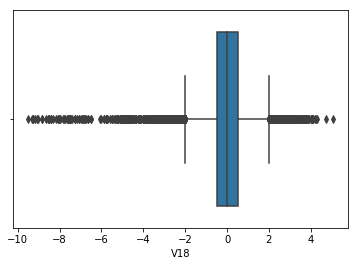

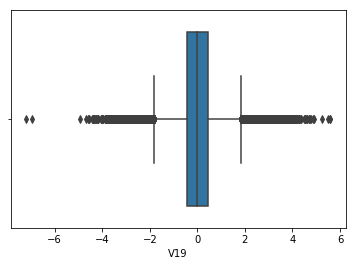

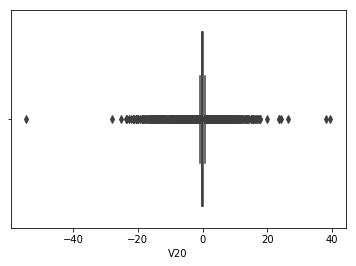

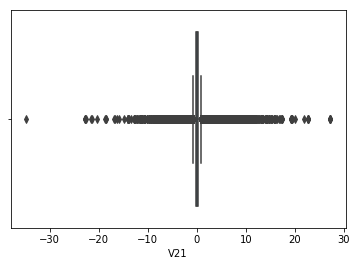

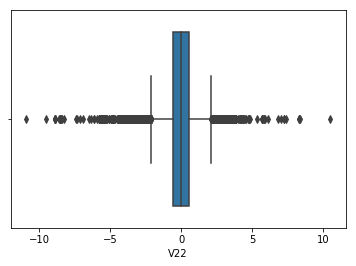

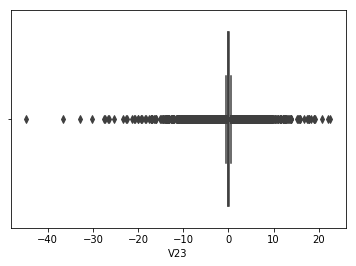

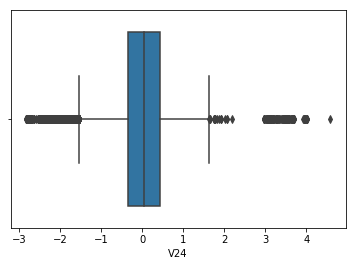

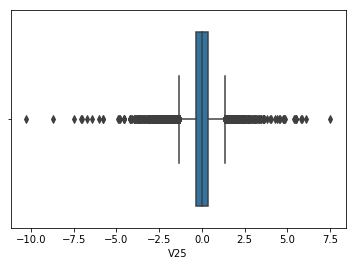

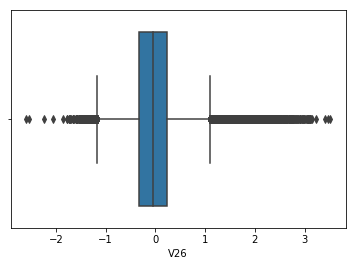

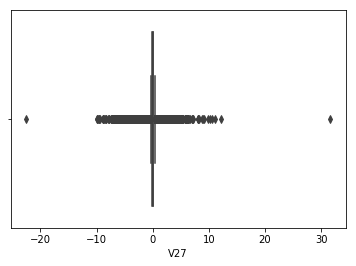

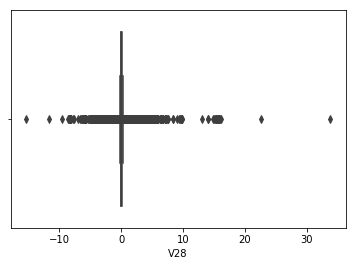

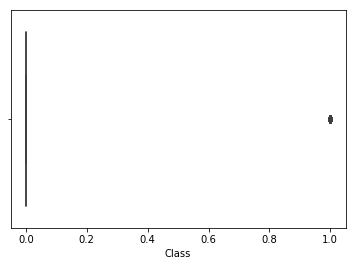

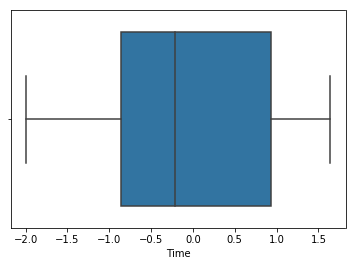

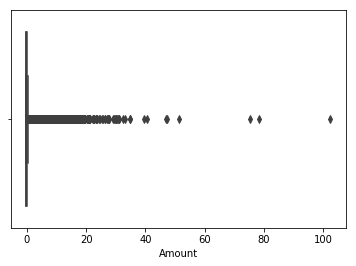

In [36]:
#Boxplot for detecting outliers
for c in credit_fraud.columns:
    sns.boxplot(credit_fraud[c])
    plt.show()

### OverSampling technique
Below we have used multiple over sampling technique:
<li>Synthetic Minority Over Sampling(SMOTE)
<li>Random Over Sampler
<li>ADASYN

### Synthetic Minorty Over Sampling

In [37]:
smote=SMOTE()
X,Y=smote.fit_resample(credit_fraud[col],credit_fraud['Class'])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [39]:
smote_log=SMOTE()
X_transformed,Y_transformed=smote_log.fit_resample(credit_fraud_copy[col],credit_fraud_copy['Class'])

In [40]:
X_train_tranformed, X_test_transformed, y_train_transformed, y_test_transformed = train_test_split(X_transformed,Y_transformed, test_size=0.33, random_state=42)

### Random Over Sampler

In [37]:
ros=RandomOverSampler()
X_ros,Y_ros=ros.fit_resample(credit_fraud[col],credit_fraud['Class'])

In [38]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, Y_ros, test_size=0.33, random_state=42)

### Adasyn

In [44]:
ada=ADASYN()
X_ada,Y_ada=ros.fit_resample(credit_fraud[col],credit_fraud['Class'])

In [45]:
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_ada, Y_ada, test_size=0.33, random_state=42)

### Model

### Logistics Regression

In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
pred_simple_logistic=model.predict(X_test)

In [34]:
#accuracy
accuracy_score(y_test,pred_simple_logistic)

0.9482595071623465

In [35]:
#Confusion Matrix
confusion_matrix(y_test,pred_simple_logistic)

array([[91461,  2314],
       [ 7395, 86478]], dtype=int64)

In [36]:
#Recall Score
recall_score(y_test,pred_simple_logistic)

0.9212233549582948

In [37]:
#Precision Score
precision_score(y_test,pred_simple_logistic)

0.9739390936120371

In [38]:
#F1 Score
f1_score(y_test,pred_simple_logistic)

0.9468480551829852

In [39]:
roc_auc_score(y_test, pred_simple_logistic)

0.9482736342906642

In [40]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_simple_logistic, pos_label=1)

### Logistic Regression with transformed dataframe

In [181]:
model_transform=LogisticRegression()

In [182]:
model_transform.fit(X_train_tranformed,y_train_transformed)

C:\Users\hni7kor\AppData\Local\Continuum\newanaconda\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [184]:
pred_simple_logistic_transformed=model_transform.predict(X_test_transformed)

In [185]:
accuracy_score(y_test_transformed,pred_simple_logistic_transformed)

0.9476519866984994

In [187]:
confusion_matrix(y_test_transformed,pred_simple_logistic_transformed)

array([[91502,  2273],
       [ 7550, 86323]], dtype=int64)

In [188]:
recall_score(y_test_transformed,pred_simple_logistic_transformed)

0.9195721879560683

In [189]:
roc_auc_score(y_test_transformed, pred_simple_logistic_transformed)

0.9476666591606521

In [ ]:
roc_auc_score(y_test, pred_simple_logistic_ros)

### Logistic Regression with Random Over Sampler

In [39]:
model_ros=LogisticRegression()

In [40]:
model_ros.fit(X_train_ros,y_train_ros)

LogisticRegression()

In [41]:
pred_simple_logistic_ros=model_ros.predict(X_test_ros)

In [42]:
accuracy_score(y_test_ros,pred_simple_logistic_ros)

0.9496663966575716

In [43]:
roc_auc_score(y_test_ros, pred_simple_logistic_ros)

0.9496807690877772

In [51]:
confusion_matrix(y_test_ros,pred_simple_logistic_ros)

array([[91637,  2138],
       [ 7307, 86566]], dtype=int64)

### Decision Treee

In [42]:
#Decision Tree
model_decision=DecisionTreeClassifier()

In [43]:
model_decision.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
pred_simple_decision=model_decision.predict(X_test)

In [45]:
#accuracy
accuracy_score(y_test,pred_simple_decision)

0.9981401347203275

In [46]:
confusion_matrix(y_test,pred_simple_decision)

array([[93534,   241],
       [  108, 93765]], dtype=int64)

In [47]:
#Recall Score
recall_score(y_test,pred_simple_decision)

0.99884950944361

In [48]:
f1_score(y_test,pred_simple_decision)

0.9981424214521049

In [49]:
#Precision

In [50]:
roc_auc_score(y_test, pred_simple_decision)

0.99813976405265

In [51]:
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_simple_decision, pos_label=1)

### Random Forest

In [53]:
model_random=RandomForestClassifier()

In [54]:
model_random.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
pred_simple_random=model_random.predict(X_test)

In [63]:
#accuracy
accuracy_score(y_test,pred_simple_random)

0.999856113574352

In [64]:
#Confusion Matrix
confusion_matrix(y_test,pred_simple_random)

array([[93753,    22],
       [    5, 93868]], dtype=int64)

In [65]:
#Recall Score
recall_score(y_test,pred_simple_random)

0.9999467365483152

In [66]:
f1_score(y_test,pred_simple_random)

0.9998562017010806

In [67]:
precision_score(y_test,pred_simple_random)

0.9997656832463521

In [68]:
roc_auc_score(y_test, pred_simple_random)

0.9998560662213717

In [70]:
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_simple_random, pos_label=1)

### Random Forest with ADASYN

In [46]:
model_random_adasyn=RandomForestClassifier()

In [47]:
model_random_adasyn.fit(X_train_ada,y_train_ada)

RandomForestClassifier()

In [50]:
pred_simple_random_ada=model_random_adasyn.predict(X_test_ada)

In [52]:
confusion_matrix(y_test_ada,pred_simple_random_ada)

array([[93767,     8],
       [    0, 93873]], dtype=int64)

In [53]:
accuracy_score(y_test_ada,pred_simple_random_ada)

0.9999573669849932

In [54]:
roc_auc_score(y_test_ada,pred_simple_random_ada)

0.9999573447080778

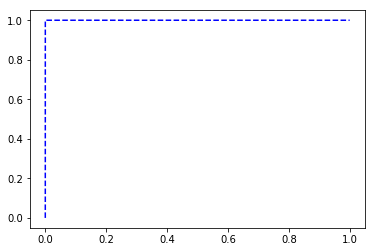

In [55]:
fpr7, tpr7, thresh7 = roc_curve(y_test_ada, pred_simple_random_ada, pos_label=1)
plt.plot(fpr7, tpr7, linestyle='--',color='blue', label='Random Forest with ADASYN')
plt.show()

### XGBoost

In [71]:
model_simple_XGB=XGBClassifier()

In [72]:
model_simple_XGB.fit(X_train,y_train)

XGBClassifier()

In [73]:
pred_simple_xgb=model_simple_XGB.predict(X_test)

In [74]:
accuracy_score(y_test,pred_simple_xgb)

0.978443681787176

In [75]:
confusion_matrix(y_test,pred_simple_xgb)

array([[92713,  1062],
       [ 2983, 90890]], dtype=int64)

In [76]:
f1_score(y_test,pred_simple_xgb)

0.9782322077223194

In [77]:
precision_score(y_test,pred_simple_xgb)

0.98845049591091

In [78]:
roc_auc_score(y_test, pred_simple_xgb)

0.9784490223597812

In [79]:
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_simple_xgb, pos_label=1)

### AdaBoost Classifier

In [80]:
model_simple_ADA=AdaBoostClassifier()

In [81]:
model_simple_ADA.fit(X_train,y_train)

AdaBoostClassifier()

In [82]:
pred_simple_ada=model_simple_ADA.predict(X_test)

In [83]:
accuracy_score(y_test,pred_simple_ada)

0.9628986186903138

In [84]:
confusion_matrix(y_test,pred_simple_ada)

array([[91673,  2102],
       [ 4860, 89013]], dtype=int64)

In [85]:
f1_score(y_test,pred_simple_ada)

0.9623651263865765

In [86]:
precision_score(y_test,pred_simple_xgb)

0.98845049591091

In [87]:
roc_auc_score(y_test, pred_simple_ada)

0.9629062845286785

In [88]:
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_simple_ada, pos_label=1)

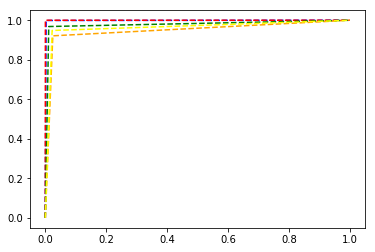

In [89]:
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='blue', label='Decision Tree')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='XG Boost')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='ADA Boost')
plt.show()

As we can see from the above result Random Forest is giving best reult since it covering maximum area.
Model accuracy based on ROC cureve
<li>Random Forest
<li>Decision Tree
<li>XG Boost
<li>ADA Boost
<li>Logistic Regression

### Crossvalidation

In [152]:
scores = []
fold_log =LogisticRegression()
cv = KFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in cv.split(X,Y):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train_cv, X_test_cv, y_train_cv, y_test_cv = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    fold_log.fit(X_train_cv, y_train_cv)
    scores.append(fold_log.score(X_test_cv, y_test_cv))

Train Index:  [ 56863  56864  56865 ... 568627 568628 568629] 

Test Index:  [    0     1     2 ... 56860 56861 56862]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [ 56863  56864  56865 ... 113723 113724 113725]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [113726 113727 113728 ... 170586 170587 170588]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [170589 170590 170591 ... 227449 227450 227451]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [227452 227453 227454 ... 284312 284313 284314]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [284315 284316 284317 ... 341175 341176 341177]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [341178 341179 341180 ... 398038 398039 398040]
Train Index:  [     0      1      2 ... 568627 568628 568629] 

Test Index:  [398041 398042 398043 ... 454901 454902 454903]
Train 

In [153]:
scores

[0.8778643406081283,
 0.970085996166224,
 0.9684153140003166,
 0.9521305594147337,
 0.9578284649068814,
 0.9117000509997714,
 0.9119990151768285,
 0.9112252255420924,
 0.9109790197492218,
 0.9092555791991277]

From the above result we can see that third split is giving better result. So taking cv as 3 for further use.

<b>Model with cross validation

In [111]:
model_hyper_logistic=LogisticRegression()
param_grid =  {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

# Create grid search object

clf = GridSearchCV(model_hyper_logistic,param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train, y_train)
print(best_clf.best_params_)


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   22.3s finished


{'C': 10, 'penalty': 'l2'}

<b> Taking the best parameter and building the model</b>

In [112]:
model_hyper_logistic=LogisticRegression(penalty='l2', C=10)

In [114]:
model_hyper_logistic.fit(X_train,y_train)

LogisticRegression(C=10)

In [115]:
pred_hyper_logistic=model_hyper_logistic.predict(X_test)

In [116]:
accuracy_score(y_test,pred_hyper_logistic)

0.948318127557981

In [118]:
roc_auc_score(y_test, pred_hyper_logistic)

0.9483320793631507

As we can see from the above result that there is slight increase in Logistic Regression model performance

<b> Random Forest with hyper parameter tuning

In [167]:
model_hyper_random=RandomForestClassifier()
param_grid =  {'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
              }

# Create grid search object

clf = GridSearchCV(model_hyper_random,param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf_random = clf.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 318.9min finished


In [168]:
best_clf_random.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 700}

In [169]:
model_hyper_random=RandomForestClassifier(max_features='sqrt', n_estimators=700, max_dept=8)

In [170]:
model_hyper_random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [171]:
pred_hyper_random=model_hyper_random.predict(X_test)

In [172]:
accuracy_score(y_test,pred_hyper_random)

0.9998774300818554

In [173]:
confusion_matrix(y_test,pred_hyper_random)

array([[93753,    22],
       [    1, 93872]], dtype=int64)

<b>Xgboost hyper parameter tuning

In [41]:
model_hyper_random=XGBClassifier()
param_grid =  {'n_estimators': [200, 700],
    'criterion' :['gini', 'entropy']
              }

# Create grid search object

clf_hyper_xgb = GridSearchCV(model_hyper_random,param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf_xgb = clf_hyper_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 25.8min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 25.9min finished


In [42]:
best_clf_xgb.best_params_

{'criterion': 'gini', 'n_estimators': 700}

In [45]:
model_hyper_xgb=XGBClassifier(n_estimators=700,criterion= 'gini')

In [46]:
model_hyper_xgb.fit(X_train,y_train)

XGBClassifier(criterion='gini', n_estimators=700)

In [47]:
pred_hyper_xgb=model_hyper_xgb.predict(X_test)

In [48]:
confusion_matrix(y_test,pred_hyper_xgb)

array([[93620,   155],
       [    1, 93872]], dtype=int64)

In [49]:
accuracy_score(y_test,pred_hyper_xgb)

0.999168656207367

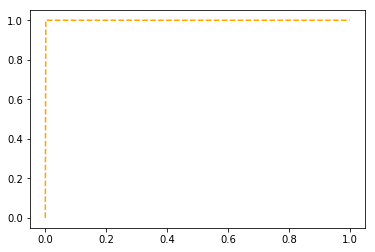

In [51]:
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_hyper_xgb, pos_label=1)
plt.plot(fpr6, tpr6, linestyle='--',color='orange', label='XG Boost hyper tuned')
plt.show()

In [52]:
roc_auc_score(y_test, pred_hyper_xgb)

0.9991682273738398

As we can see that from our prvoious simple XG boost model, XG boost with hyper tuning is performing better

### Result

From all above model, as we can see that <b>Random Forest with ADASYN</b> over sampler is giving the best result.
<b>Measuring the performance for our top model
<b>Confusion Matrix for Random Forest Model with Adasyn over sampling
<ul>[[93767,8],</ul>
<ul>[0,93873]]
 

As we cann see from the above result that the for 8 data point actual predication was non fraud and the predicted as fraud. The reponsible team will directly get in contact to the responsible user for the transaction.Moreover if there was actual fraud in our dataset that model is able to find all the fraud cases. This is major concern which has to been reduced and our model has performed well in that case.